In [1]:
import datetime as datetime

import requests
import json
def extract_data(start, end):
    while start <= end:        
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)
    
counter=0
if __name__ == '__main__':
    for a in extract_data(datetime.date(2021, 1, 1), datetime.date.today()):
        counter=counter+1
        print(counter)
        print(a.status_code)

1
400
2
400
3
400
4
400
5
400
6
400
7
400
8
400
9
400
10
400
11
400
12
400
13
400
14
400
15
400
16
400
17
400
18
400
19
400
20
400
21
400
22
400
23
400
24
400
25
400
26
400
27
400
28
400
29
400
30
400
31
400
32
400
33
400
34
400
35
400
36
400
37
400
38
400
39
400
40
400
41
400
42
400
43
400
44
400
45
400
46
400
47
400
48
400
49
400
50
400
51
400
52
400
53
400
54
400
55
400
56
400
57
400
58
400
59
400
60
400
61
400
62
400
63
400
64
400
65
400
66
400
67
200
68
200
69
200
70
200
71
200
72
200
73
200
74
200
75
200
76
200
77
200
78
200
79
200
80
200
81
200
82
200
83
200
84
200
85
200
86
200
87
200
88
200
89
200
90
200
91
200
92
200
93
200
94
200
95
200
96
200
97
200
98
200
99
200
100
200
101
200
102
200
103
200
104
200
105
200
106
200
107
200
108
200
109
200
110
200
111
200
112
200
113
200
114
200
115
200
116
200
117
200
118
200
119
200
120
200
121
200
122
200
123
200
124
200
125
200
126
200
127
200
128
200
129
200
130
200
131
200
132
200
133
200
134
200
135
200
136
200
137
200
138
200
139


In [2]:
import datetime as datetime
from datetime import timedelta

import requests
import json

import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
vaccine_data2=[]
vaccine_data_by_age2=[]
vaccine_sites2=[]
vaccine_sessions2=[]

def extract_data(start, end):
    while start<= end:
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_data1=r['topBlock']['vaccination'] #08March onwards data is there in the API
        vaccine_data2.append(vaccine_data1) #Storing the vaccine_0date in a list
        vaccine_sites1=r['topBlock']['sites'] #08March onwards data is there in the API
        vaccine_sites2.append(vaccine_sites1) #Storing the vaccine sites data in a list
        vaccine_sessions1=r['topBlock']['sessions'] #08March onwards data is there in the API
        vaccine_sessions2.append(vaccine_sessions1) #Storing the vaccine sessions in a list

In [4]:
vaccine_dataframe1=pd.DataFrame(vaccine_data2) # Converting into a dataframe

In [5]:
#replacing Not-a-Number value to 0

vaccine_dataframe1 = vaccine_dataframe1.replace(np.NaN, 0)
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,343176083.0,1.085078e+09,...,812572.0,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0
245,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,347388021.0,1.091116e+09,...,1755965.0,4119003.0,2941009.0,2932427.0,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0
246,1096713028,563722357,528564992,246551,968139879,123299280,5237586,745367580.0,351345448.0,1.096713e+09,...,1501316.0,3736270.0,2607509.0,2628688.0,1388.0,125.0,1094741.0,5896426.0,1765558.0,4130868.0
247,1102688458,566669979,531591379,247972,973528193,123884730,5722747,746844650.0,355843808.0,1.102688e+09,...,1381815.0,4340932.0,2818834.0,2902543.0,1370.0,134.0,1096407.0,5258251.0,1509582.0,3748669.0


In [6]:

#https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
#https://docs.python.org/3/library/datetime.html

# The following code is done to add dates to our dataframe

start_date = datetime.date(2021, 3, 8)   # start date
end_date = datetime.date.today()    # end date
time_diff=end_date-start_date  
dates_vaccine=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [7]:
dates_vaccine

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11'],
              dtype='datetime64[ns]', length=249, freq='D')

In [8]:
dates_vaccine.shape

(249,)

In [9]:
#Adding the date column
vaccine_dataframe1['dates_vaccine']=dates_vaccine

In [10]:
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,343176083.0,1.085078e+09,...,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0,2021-11-07
245,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,347388021.0,1.091116e+09,...,4119003.0,2941009.0,2932427.0,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0,2021-11-08
246,1096713028,563722357,528564992,246551,968139879,123299280,5237586,745367580.0,351345448.0,1.096713e+09,...,3736270.0,2607509.0,2628688.0,1388.0,125.0,1094741.0,5896426.0,1765558.0,4130868.0,2021-11-09
247,1102688458,566669979,531591379,247972,973528193,123884730,5722747,746844650.0,355843808.0,1.102688e+09,...,4340932.0,2818834.0,2902543.0,1370.0,134.0,1096407.0,5258251.0,1509582.0,3748669.0,2021-11-10


In [11]:
vaccine_dataframe1.insert(0, 'date_index', np.arange(0, len(vaccine_dataframe1)))

In [12]:
#Removing the last row because it has incomplete data

vaccine_dataframe = vaccine_dataframe1[:-1]
vaccine_dataframe.set_index('date_index')

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
date_index,,,,,,,,,,,,,,,,,,,,,
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,341502896.0,1.082515e+09,...,2085015.0,1401060.0,1417967.0,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0,2021-11-06
244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,343176083.0,1.085078e+09,...,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0,2021-11-07
245,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,347388021.0,1.091116e+09,...,4119003.0,2941009.0,2932427.0,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0,2021-11-08


In [15]:
#Storing the resultant dataframe into a csv file.
vaccine_dataframe.to_csv('vaccine_dataframe.csv')
vaccine_dataframe_excel = vaccine_dataframe.to_excel('vaccine_dataframe.xlsx')

In [16]:
vaccine_dataframe= pd.read_csv('C:/Users/denyd/vaccine_dataframe.csv')

<AxesSubplot:>

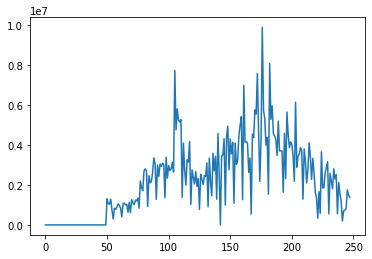

In [17]:
vaccine_dataframe['today_dose_one'].plot()

In [18]:
vaccine_dataframe = vaccine_dataframe.replace(np.NaN, 0)
vaccine_dataframe

,Unnamed: 0,date_index,total,male,female,others,covishield,covaxin,today,tot_dose_1,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,0,0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,1,1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,2,2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,3,3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,4,4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,243,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,...,2085015.0,1401060.0,1417967.0,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0,2021-11-06
244,244,244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,...,1542398.0,1189616.0,1164660.0,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0,2021-11-07
245,245,245,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,...,4119003.0,2941009.0,2932427.0,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0,2021-11-08
246,246,246,1096713028,563722357,528564992,246551,968139879,123299280,5237586,745367580.0,...,3736270.0,2607509.0,2628688.0,1388.0,125.0,1094741.0,5896426.0,1765558.0,4130868.0,2021-11-09


<AxesSubplot:>

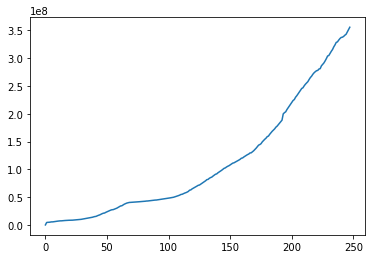

In [19]:
vaccine_dataframe['tot_dose_2'].plot()

<AxesSubplot:>

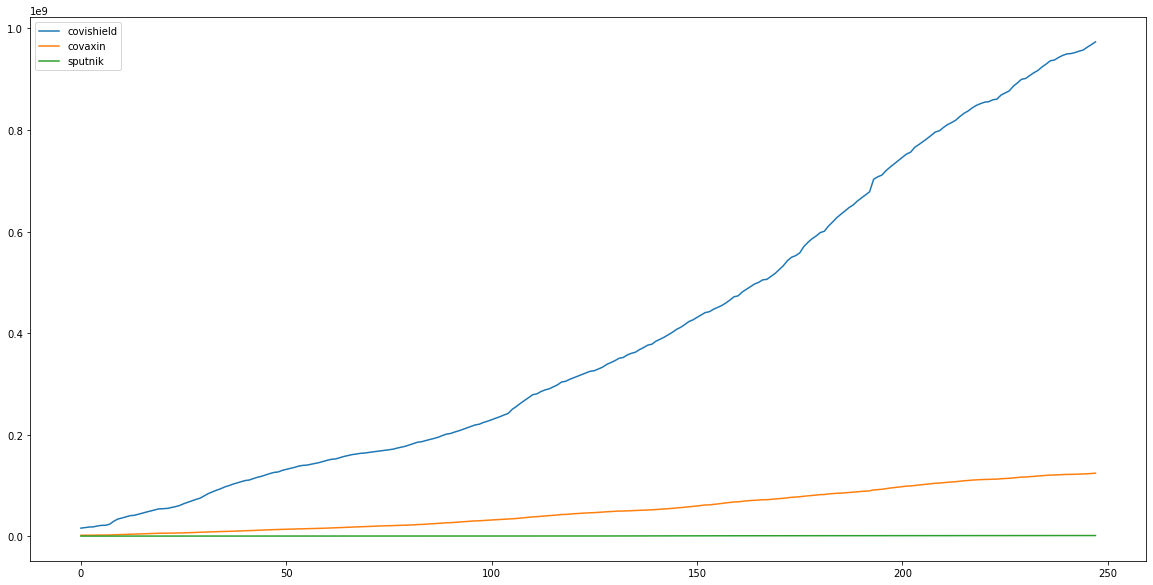

In [20]:
vaccine_dataframe[['covishield','covaxin','sputnik']].plot(figsize = (20,10))

In [21]:
first_c = vaccine_dataframe.pop('dates_vaccine')
vaccine_dataframe.insert(1, 'dates_vaccine', first_c)
#vaccine_dataframe.set_index('date_index')

<AxesSubplot:>

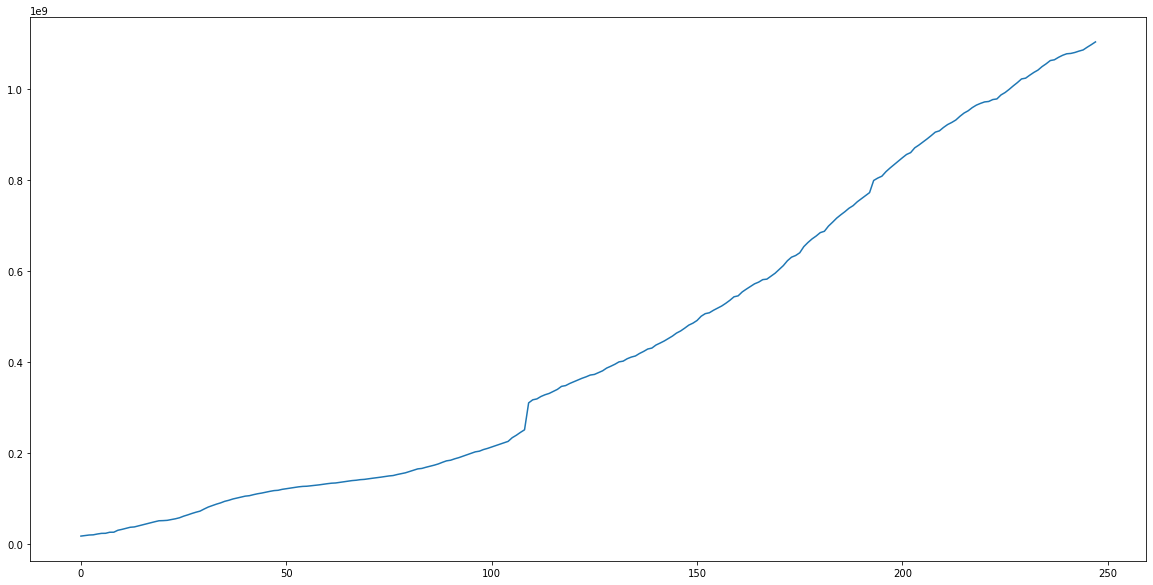

In [22]:
vaccine_dataframe['total'].plot(figsize = (20,10))

In [29]:
#Define x and y
x = vaccine_dataframe[['tot_dose_2']]
y = vaccine_dataframe[['date_index']]

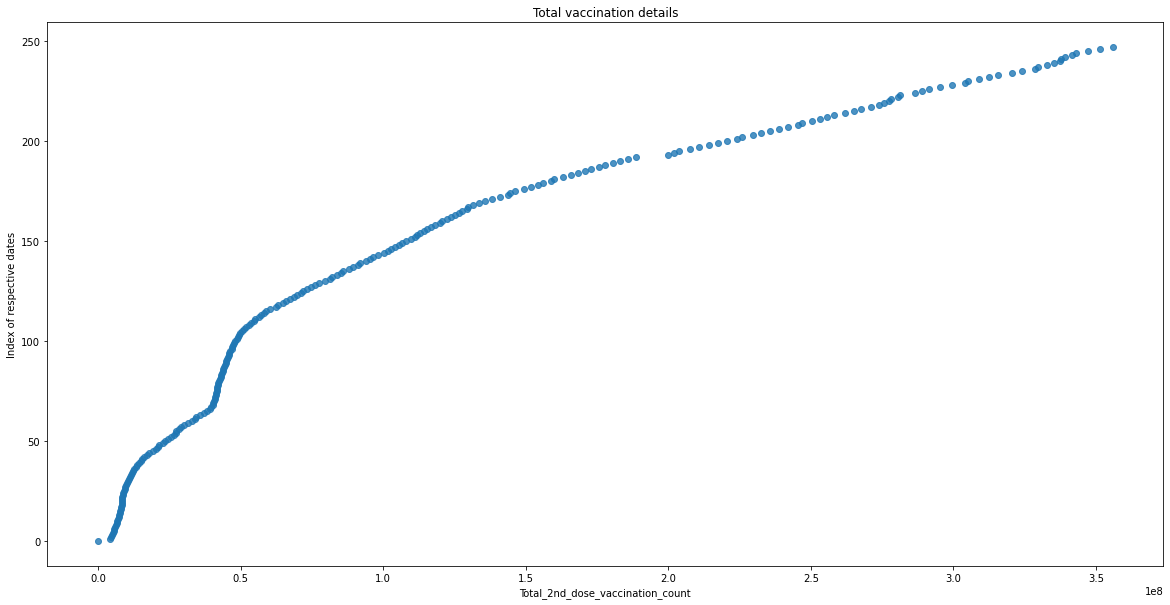

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.8)
plt.title('Total vaccination details')
plt.xlabel('Total_2nd_dose_vaccination_count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [31]:
y.shape

(248, 1)

In [32]:
#random forest regressor model
from sklearn.ensemble import RandomForestRegressor

In [33]:
#instantiate random forest regressor
rf=RandomForestRegressor(random_state=42)

In [34]:
#Splitting the dataset in training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [35]:
# fit the random forest model to the training data
rfmodel=rf.fit(x_train,y_train)

<ipython-input-35-7c679ec9001d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel=rf.fit(x_train,y_train)


In [36]:
#do prediction using our test data
y_pred_r=rfmodel.predict(x_test)

In [37]:
,#Evaluate the model,i.e evaluating the error and this should be as low as possible
#Using regression metric to evaluate the model
#Import regression metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [38]:
#Calculating the performance of the random forest model
mae_r=mean_absolute_error(y_test,y_pred_r)
mse_r=mean_squared_error(y_test,y_pred_r)
print(f"Mean absolute error : {mae_r},\nMean squared error : {mse_r}")

Mean absolute error : 0.7669333333333324,
Mean squared error : 0.8703439999999975


In [39]:
#Splitting the dataset in training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
#train the model in the training set
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred=ml.predict(x_test)

In [42]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

21.78273394960352
617.6957599627438
